EM-algorithm

### L2 regularization

$p(y|x)=N(Hx,\beta^{-1}I)$

$p(x)=N(0,\alpha^{-1}I)$

we cant oveserve only y.

SO we want to find the $\alpha,\beta $ that maximize $p(y|\alpha,\beta)$(marginal likelihood)



In [296]:
## generate y giben alpha=2.0,beta=2.0
import numpy as np

H = np.identity(2)*3
#np.random.shuffle(H)
H = np.reshape(H[np.newaxis,:],(2,2))
x_array=[]
y_array=[]
for i in range(0,100):
    x = np.random.normal(0,0.5,2)
    y =np.dot(H,np.transpose(x))+np.random.normal(0,0.5,2)
    y = y[:,np.newaxis]
    x_array.append(x)
    y_array.append(y)

print np.mean(x_array,0)

[ 0.02682002 -0.03769605]


[[ 9.  0.]
 [ 0.  9.]]
5.0


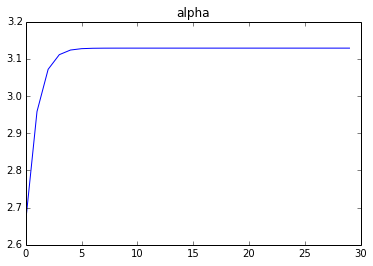

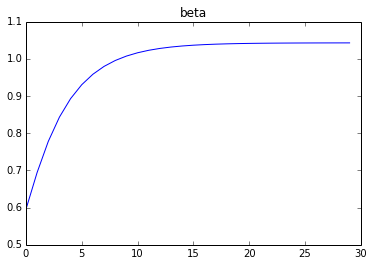

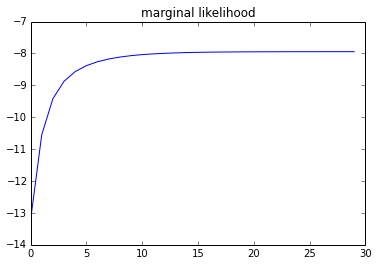

In [298]:
import numpy as np
import matplotlib.pyplot as plt

## initilize
alpha=2.0
beta=0.5
## cacluete H^t*H
HH = np.dot(np.transpose(H),H)
print HH
print np.linalg.norm([3,4])
alpha_array=[]
beta_array=[]
marge_array=[]
for j in range(0,30):
    ##E-step we calculde p(x|y,alpha,beta)=N(x|pesdp_x,D^{-1})
    D = alpha*np.identity(2) + beta*HH
    ##print D
    x_pesdo = np.array([beta*np.linalg.solve(D,np.dot(np.transpose(H),i)) for i in y_array])
    ## M-step 
    x_pesdo_norm = np.array([np.linalg.norm(i) for i in x_pesdo])
    alpha = np.power(np.mean(x_pesdo_norm)+np.trace(np.linalg.inv(D)),-1)*2.0
    ##print alpha
    alpha_array.append(alpha)
    res_norm  = np.array([np.linalg.norm(j-np.dot(H,i)) for i,j in zip(x_pesdo,y_array)])
    beta = np.power(np.mean(res_norm)+np.trace(np.dot(HH,np.linalg.inv(D))),-1)*2.0
    ##print beta
    beta_array.append(beta)
    ## marginal likelihood
    E = np.power(beta,-1)*np.identity(2)+np.power(alpha,-1)*np.dot(H,np.transpose(H))
    margi_y=[-0.5*np.linalg.det(E)-0.5*np.dot(np.transpose(i),np.dot(np.linalg.inv(E),i))  for i in y_array]
    marge_array.append(np.mean(margi_y))
    
%matplotlib inline
plt.title("alpha")
plt.plot(alpha_array)
plt.show()
plt.title("beta")
plt.plot(beta_array)
plt.show()
plt.title("marginal likelihood")
plt.plot(marge_array)
plt.show()
###x_pesdo = beta*np.transpose(np.transpose(np.invert(HH),np.transpose(H)),y)